In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pickle

In [76]:
path = "C:/Users/SS/Downloads/movielens/"
movies = pd.read_csv(path + "movies.csv")
tags = pd.read_csv(path + "tags.csv")
ratings = pd.read_csv(path + "ratings.csv")

In [77]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [78]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [79]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [80]:
len(movies.movieId.unique())

9742

In [81]:
len(ratings.movieId.unique())

9724

In [82]:
movies['genres'] = movies['genres'].str.replace('|',' ')

C:\Users\SS\AppData\Local\Temp\ipykernel_12160\1845334057.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|',' ')


In [83]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy
9738,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation


In [84]:
#Remove users who have not atleast rated 30 movies
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >=30)

In [85]:
#list the movie titles that survive the following
movie_list_rating = ratings_f.movieId.unique().tolist()

In [86]:
len(ratings_f.movieId.unique())/len(movies.movieId.unique())*100

99.48675836583864

In [87]:
len(ratings_f.userId.unique())/len(ratings.userId.unique())*100

82.1311475409836

In [88]:
#filter the movies data frame
movies = movies[movies.movieId.isin(movie_list_rating)]

In [89]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [90]:
tags.drop(['timestamp'],1, inplace=True)
tags

C:\Users\SS\AppData\Local\Temp\ipykernel_12160\2390936135.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tags.drop(['timestamp'],1, inplace=True)


,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA
...,...,...,...
3678,606,7382,for katie
3679,606,7936,austere
3680,610,3265,gun fu
3681,610,3265,heroic bloodshed


In [91]:
ratings_f.drop(['timestamp'],1, inplace = True)
ratings_f

C:\Users\SS\AppData\Local\Temp\ipykernel_12160\3443658000.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ratings_f.drop(['timestamp'],1, inplace = True)


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


# Merge movies and tags data frame and create metadata tag for each movie

In [92]:
#create a mixed dataframe of movies title, genres 
#and all user tags given to each movie
mixed = pd.merge(movies, tags, on = 'movieId', how='left')
mixed

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,336.0,pixar
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,474.0,pixar
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,567.0,fun
3,2,Jumanji (1995),Adventure Children Fantasy,62.0,fantasy
4,2,Jumanji (1995),Adventure Children Fantasy,62.0,magic board game
...,...,...,...,...,...
11794,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,NaN,NaN
11795,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,NaN,NaN
11796,193585,Flint (2017),Drama,NaN,NaN
11797,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,NaN,NaN


In [93]:
# create metadata from tags and genres
mixed.fillna("", inplace=True) #replaced NaN with "
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies, mixed, on='movieId', how='left')
Final ['metadata'] = Final[['tag', 'genres']].apply(lambda x: ' '.join(x), axis = 1)

Final[['movieId', 'title', 'metadata']].head()


,movieId,title,metadata
0,1,Toy Story (1995),pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),moldy old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),pregnancy remake Comedy


In [94]:
Final

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun,pixar pixar fun Adventure Animation Children C...
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game,fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old,moldy old Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance,,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,pregnancy remake Comedy
...,...,...,...,...,...
9687,193581,Black Butler: Book of the Atlantic (2017),Action Animation Comedy Fantasy,,Action Animation Comedy Fantasy
9688,193583,No Game No Life: Zero (2017),Animation Comedy Fantasy,,Animation Comedy Fantasy
9689,193585,Flint (2017),Drama,,Drama
9690,193587,Bungo Stray Dogs: Dead Apple (2018),Action Animation,,Action Animation


In [95]:
Final.loc[0,'metadata']

'pixar pixar fun Adventure Animation Children Comedy Fantasy'

In [96]:
Final.shape

(9692, 5)

# Creating a content latent matrix from movie metadata

### tf-idf vectors and truncated SVD:

t1 - good is at are
t2 - bad good are copy

      word
user  good  is  at  are  bad copy
t1     1     1   1   1    0   0
t2     1    0    0   1    1   1


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  tfidf vector give importance to to rare words
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
print(tfidf_df.shape)


(9692, 1675)


In [98]:

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

tfidf_df.head(100)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.149183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.185083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [99]:
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [100]:
tfidf_df.loc[180]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1670    0.0
1671    0.0
1672    0.0
1673    0.0
1674    0.0
Name: 180, Length: 1675, dtype: float64

In [101]:
#compress with SVD
from sklearn.decomposition import TruncatedSVD

In [102]:
svd = TruncatedSVD(n_components=17)
latent_matrix = svd.fit_transform(tfidf_df)

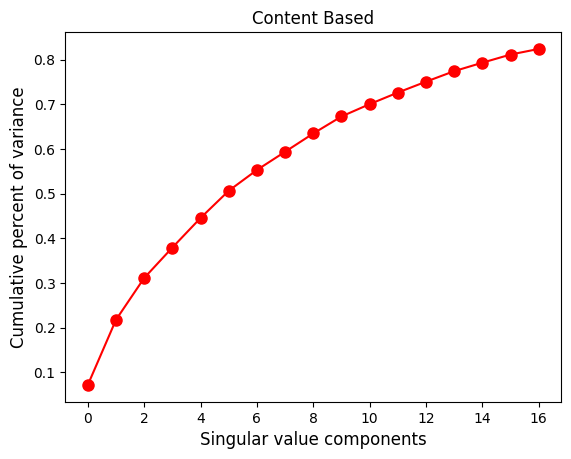

In [103]:
#plot var explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color = 'red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.title("Content Based")
plt.show()

In [104]:
#number of latent dimensions to keep
n = 17
latent_matrix_1_df =pd.DataFrame(latent_matrix[:,0:n], index = Final.title.tolist())

In [105]:
#our content latent matrix
latent_matrix.shape

(9692, 17)

In [106]:
latent_matrix

array([[ 1.02319243e-01,  8.27150260e-02,  6.91541079e-02, ...,
        -4.91213645e-02, -1.53634777e-02, -6.91506628e-04],
       [ 3.25634310e-02,  8.74320677e-03,  5.89062843e-02, ...,
         1.06827904e-02,  7.88470753e-02, -1.04214557e-03],
       [ 1.47921130e-01,  1.05125490e-01, -4.24892630e-02, ...,
        -6.71094090e-03,  2.92023744e-03, -9.97232153e-04],
       ...,
       [ 6.33547825e-01, -6.67083684e-01, -2.98809324e-01, ...,
        -1.26456181e-02,  3.29891738e-03, -3.55210321e-03],
       [ 1.13564087e-01, -1.17891619e-02,  3.38009062e-01, ...,
        -2.67968202e-01, -4.77796193e-01,  6.57578994e-03],
       [ 6.59799511e-01,  7.07625766e-01, -3.89324170e-02, ...,
        -1.19539517e-02, -1.17409866e-02, -1.77102863e-03]])

In [107]:
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Toy Story (1995),0.102319,0.082715,0.069154,0.086145,-0.154624,0.012560,0.235743,-0.009019,-0.123068,-0.007559,0.023030,0.030801,0.007308,-0.028933,-0.049121,-0.015363,-0.000692
Jumanji (1995),0.032563,0.008743,0.058906,0.087990,-0.109266,0.007703,0.189545,-0.005994,-0.076294,0.002385,-0.106920,0.121991,0.026508,-0.067989,0.010683,0.078847,-0.001042
Grumpier Old Men (1995),0.147921,0.105125,-0.042489,0.125555,0.094339,-0.038968,-0.011947,0.000642,0.004673,-0.002245,0.004847,-0.005316,-0.001983,0.000190,-0.006711,0.002920,-0.000997
Waiting to Exhale (1995),0.824753,0.064738,-0.291317,0.387504,0.261660,-0.079529,-0.046060,-0.000884,0.027902,-0.000708,0.019997,-0.013192,-0.033414,0.005034,-0.029774,0.011925,-0.005194
Father of the Bride Part II (1995),0.113089,0.120927,-0.006474,-0.037382,-0.006020,0.010205,-0.009193,-0.002292,0.004022,-0.011453,-0.004460,-0.000382,0.001137,0.001070,-0.001306,-0.001853,-0.000524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.329603,0.222047,0.298712,0.147473,-0.335614,-0.095916,0.314177,-0.014944,0.044164,0.079713,0.204475,0.511173,0.038385,-0.108548,-0.216644,-0.369441,0.011339
No Game No Life: Zero (2017),0.296892,0.275373,0.096981,0.103246,-0.231202,0.059762,0.401972,-0.017292,-0.241637,0.016308,0.108557,0.475144,0.090275,-0.173550,-0.252625,-0.443604,0.017747
Flint (2017),0.633548,-0.667084,-0.298809,-0.131024,-0.161630,0.127920,-0.007296,-0.006805,0.024060,0.015651,0.005831,0.012329,-0.056481,0.009341,-0.012646,0.003299,-0.003552
Bungo Stray Dogs: Dead Apple (2018),0.113564,-0.011789,0.338009,0.164129,-0.317092,-0.182377,0.175859,-0.006564,0.142342,0.099080,0.568947,0.116997,-0.064593,0.088826,-0.267968,-0.477796,0.006576


# Creating a collaborative latent matrix from user ratings: 

In [108]:
ratings_f

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [109]:
# creating user rating for every movie, give zero if not watched
ratings_f1 = pd.merge(movies[['movieId']],ratings_f,on="movieId", how = 'right')
ratings_f2 = ratings_f1.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
ratings_f2

userId,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,28,29,30,31,32,33,34,36,38,39,40,41,42,43,44,45,46,47,48,50,51,52,54,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,82,83,84,85,86,88,89,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,121,122,123,124,125,126,128,129,131,132,133,134,135,136,137,139,140,141,142,143,144,146,148,149,151,152,153,154,155,156,159,160,161,162,164,165,166,167,168,169,170,171,174,176,177,178,179,181,182,183,184,185,186,187,188,190,191,193,195,196,197,198,199,200,201,202,203,204,209,210,211,212,213,215,216,217,219,220,221,222,223,224,225,226,227,229,230,232,233,234,235,236,237,238,239,240,241,242,243,244,246,247,248,249,252,253,254,255,256,260,261,262,263,264,265,266,267,268,270,271,272,273,274,275,276,279,280,282,283,284,285,286,287,288,290,291,292,294,295,297,298,300,301,302,303,...,305,306,307,308,309,310,312,313,314,315,316,317,318,319,321,322,323,325,326,327,328,330,331,332,334,336,337,338,339,341,342,343,344,345,346,347,348,349,350,351,352,353,354,356,357,358,359,361,362,363,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,389,390,391,393,395,398,399,400,401,402,403,404,405,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,424,425,426,427,428,429,430,432,434,435,436,437,438,440,441,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,460,462,463,464,465,466,468,469,470,473,474,475,476,477,479,480,481,482,483,484,486,487,488,489,490,491,492,493,495,497,498,500,501,502,503,504,505,506,509,510,511,512,513,514,517,520,521,522,523,524,525,526,527,528,532,533,534,535,536,537,538,539,540,541,542,543,546,551,552,553,554,555,556,558,559,560,561,562,563,564,566,567,570,571,572,573,575,577,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,596,597,599,600,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,4.5,3.5,4.0,0.0,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,3.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,3.0,4.0,5.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,2.5,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.5,4.0,0.0,0.0,2.5,0.0,0.0,0.0,4.0,0.0,3.0,3.0,4.0,3.0,0.0,0.0,5.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.5,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,4.0,0.0,4.0,0.0,3.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,5.0,0.0,2.0,0.0,3.0,4.0,4.5,4.0,4.0,0.0,0.0,0.0,5.0,3.5,0.0,4.5,0.0,5.0,0.0,0.0,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,3.5,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,3.0,4.0,3.5,5.0,0.0,0.0,3.5,0.0,0.0,3.5,0.0,5.0,0.0,3.5,3.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.5,0.0,4.5,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,5.0,4.0,5.0,4.0,3.0,4.5,4.5,3.0,0.0,0.0,0.0,0.0,4.5,4.0,4.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.5,0.0,0.0,0.0,5.0,4.0,0.0,4.0,3.5,4.0,4.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.5,0.0,5.0,3.5,4.5,0.0,0.0,4.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0,4.0,0.0,4.5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,4.5,1.5,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,

In [110]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 120)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index = Final.title.tolist())

In [111]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
Toy Story (1995),37.401505,-6.035508,15.081985,0.762342,-2.296816,4.067333,8.777184,-1.909854,1.248787,1.466365,2.772987,2.154275,-6.721415,-1.071729,4.440671,-2.762007,0.199869,-0.141620,1.458419,0.702314,5.868081,9.521893,1.111302,-2.030141,2.473708,-1.318285,0.783077,-2.661185,-1.912471,0.537884,3.622908,0.874652,4.573123,2.228010,-0.436910,2.314091,6.164372,1.764645,-2.288745,-1.509687,-3.509250,1.147328,3.072089,0.903169,-2.207288,-6.249528,-2.343284,3.972097,0.835602,-2.236642,1.686914,0.763290,-5.340091,6.878073,2.099595,4.550247,0.722323,0.856620,4.244788,-0.022915,1.165169,0.041735,-1.259141,2.459568,4.504098,0.422917,-2.244573,-4.036520,3.589906,2.296748,7.674599,-0.240385,-3.852895,-0.475358,-2.827081,1.773032,0.484665,-1.690389,-0.112404,0.743831,3.771371,5.169157,1.270254,2.053143,1.678627,-2.384355,-2.432762,0.738161,3.539828,-0.785136,1.194195,-2.521627,-1.814478,0.345889,1.244127,-1.271870,2.208508,2.036924,5.057978,-0.426747,-1.432284,1.209072,2.059169,-0.100674,1.466230,3.203636,-1.285073,-3.922668,2.190677,0.913672,-3.537849,2.341871,1.168500,1.004072,-1.755225,-2.140186,2.282054,-3.495232,0.279396,0.039695
Jumanji (1995),20.604295,-0.251423,11.425060,-8.246932,-3.312220,-1.397684,4.406270,-4.001412,-3.358506,0.306794,2.865529,-0.179414,2.510634,-2.001575,-2.134693,1.921193,-0.026212,0.395018,1.394401,0.233874,-1.084483,-0.402067,-2.882583,-0.521014,2.314584,-0.404563,-2.916218,-2.323552,-0.305816,0.292341,-1.842033,-1.239615,0.498903,1.806407,1.780772,0.975607,0.650525,-1.116395,-0.189481,1.322339,0.691276,0.387295,-3.635674,2.800123,0.231630,-2.232429,2.861396,1.248611,-1.844348,0.171165,1.694740,-0.785498,2.152605,1.309488,-0.198770,-1.718704,-1.275213,5.349732,-2.157503,-3.855791,0.176725,-0.928793,0.018439,-2.023546,-4.322517,3.556381,-1.282186,1.435763,0.749954,0.353371,-2.626119,-0.241310,2.059962,-1.580419,2.937574,-0.995497,-0.849732,1.658373,-1.544334,1.317583,-0.550330,2.724270,0.637001,0.114782,1.622562,2.282478,-0.055958,1.444338,-0.535340,-0.879338,-1.559079,2.794235,-0.408194,-0.425042,-0.733107,-0.734936,0.383301,-1.862631,4.235479,-1.208610,1.832548,-1.088062,-1.295394,1.576867,-0.056966,0.896452,-1.240226,1.775081,-0.884568,0.000798,-2.642473,0.543809,-0.397478,-1.719806,2.245590,1.156138,-1.492765,0.402947,-1.059355,-1.788451
Grumpier Old Men (1995),8.467964,-5.560888,3.763585,-6.307831,-0.101689,-1.058485,-1.483861,-0.686195,3.251522,1.929492,1.684393,-2.020572,1.949870,0.705350,1.254491,1.704509,-0.106449,-0.535318,0.450699,-2.505529,2.327392,-0.624823,-0.184415,-3.482469,-0.166305,-1.623933,-0.746049,-1.241591,1.532093,-1.491661,1.655267,-3.816600,4.298687,0.935191,1.991244,-0.149851,-1.524365,0.157922,-2.757335,-1.571051,1.040461,0.338026,-1.206263,0.357183,-0.799743,0.571887,-0.835704,-1.786046,0.923588,0.706895,1.400828,-0.694579,-2.672318,1.442860,0.372701,-2.339380,-2.547780,0.496789,-2.365419,1.458875,-0.305417,-1.835196,-1.810261,-2.463233,-0.406701,-0.016003,-1.712363,1.271258,0.595743,2.401801,-0.702673,-2.222636,-1.016810,2.209018,0.926387,0.870540,1.903235,-0.944823,3.014813,-1.929155,1.751404,0.383222,0.033015,2.082267,0.909886,-0.512969,0.353666,-0.669370,-1.601821,-1.090568,0.445166,-0.909001,0.720767,-0.567563,-1.420130,0.945503,0.809668,0.526066,-0.144444,-0.799271,0.857910,-0.949819,1.006312,0.992132,-0.619302,-1.546989,-0.415838,-1.218565,0.137271,-1.151121,-0.663008,0.253164,0.095577,-0.496265,0.080051,-1.772148,0.294378,0.122016,0.820393,0.400057
Waiting to Exhale (1995),0.465355,-0.810720,0.982528,-0.212997,-0.710549,-0.993608,0.208490,-0.568032,0.089015,0.037284,0.162611,0.103458,0.052469,0.087755,0.2

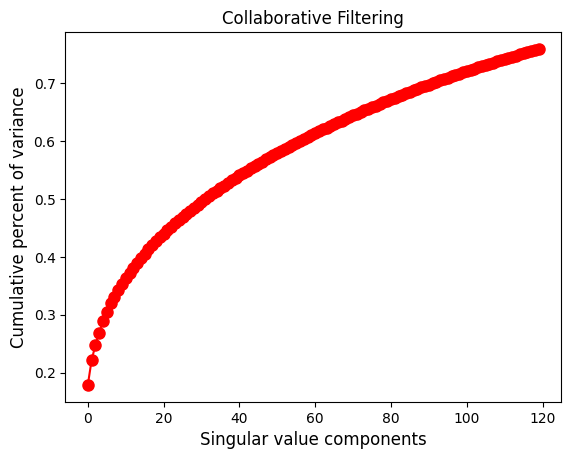

In [112]:
#plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color = 'red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.title("Collaborative Filtering")
plt.show()

# Running a content/ collaborative and hybrid cosine similarity

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

movieName = 'Toy Story (1995)'
#take the latent vectors for a selected movie from both content and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc[movieName]).reshape(1,-1)
a_2 = np.array(latent_matrix_2_df.loc[movieName]).reshape(1,-1)

#calculate similarity of this movie with others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

#an average measure of both content and collaborative
hybrid = ((score_1 + score_2)/2.0)

#form a data frame of similar movies
dictDf = {'content' : score_1, 'collaborative' : score_2, 'hybrid' : hybrid}
similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)

#sort it on the basis of either: content, collaborative or hybrid
similar.sort_values('hybrid', ascending = False, inplace = True)

In [114]:
a_1.shape

(1, 17)

In [115]:
similar[1:].head(15)

,content,collaborative,hybrid
Toy Story 2 (1999),0.943861,0.709735,0.826798
"Monsters, Inc. (2001)",0.999989,0.643017,0.821503
Shrek (2001),0.932969,0.679307,0.806138
Toy Story 3 (2010),0.999458,0.534064,0.766761
Finding Nemo (2003),0.877537,0.628691,0.753114
"Bug's Life, A (1998)",0.876967,0.628564,0.752766
Antz (1998),0.999989,0.469683,0.734836
Ice Age (2002),0.876912,0.513567,0.695240
Aladdin (1992),0.720471,0.666363,0.693417
"Incredibles, The (2004)",0.795456,0.588398,0.691927


In [116]:
score_1.shape

(9692,)

In [117]:
hybrid.shape

(9692,)